In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# PARAMETERS
save_fig_to_disk = False # If set to True, figure will be saved to disk. Set to false if you don't want figure to be saved to disk.

In [3]:
# Load numerical simulation data points: provided to us courtesy of Jacob Shen from the S2023 paper.
data_c_10 = np.genfromtxt(os.path.join('..', 'Data', 'S2023 Fig 3, c=10.dat'), dtype=None, delimiter='') 
data_c_10 = np.genfromtxt(os.path.join('..', 'Data', 'S2023 Fig 3, c=10.dat'), dtype=None, delimiter='')
data_c_30 = np.genfromtxt(os.path.join('..', 'Data', 'S2023 Fig 3, c=30.dat'), dtype=None, delimiter='')
data_c_100 = np.genfromtxt(os.path.join('..', 'Data', 'S2023 Fig 3, c=100.dat'), dtype=None, delimiter='')

# Load E_frac array
E_fracs = np.load(r"E_fracs.npy")

# Load survival fractions computed by using the K2021 analytical approach
survival_fractions_c_10 = np.load(r"survival_fractions_c_10_K2021.npy")
survival_fractions_c_30 = np.load(r"survival_fractions_c_30_K2021.npy")
survival_fractions_c_100 = np.load(r"survival_fractions_c_100_K2021.npy")
survival_fractions_c_500 = np.load(r"survival_fractions_c_500_K2021.npy")

# Load the survival fractions computed using the S2023 semi-analytical fitting functions
survival_fractions_S2022_fitting_fn_c_10 = np.load(os.path.join('..', 'Data', "survival_fractions_S2022_fittingfn_c_10.npy"))
survival_fractions_S2022_fitting_fn_c_30 = np.load(os.path.join('..', 'Data', "survival_fractions_S2022_fittingfn_c_30.npy"))
survival_fractions_S2022_fitting_fn_c_100 = np.load(os.path.join('..', 'Data', "survival_fractions_S2022_fittingfn_c_100.npy"))
survival_fractions_S2022_fitting_fn_c_500 = np.load(os.path.join('..', 'Data', "survival_fractions_S2022_fittingfn_c_500.npy"))

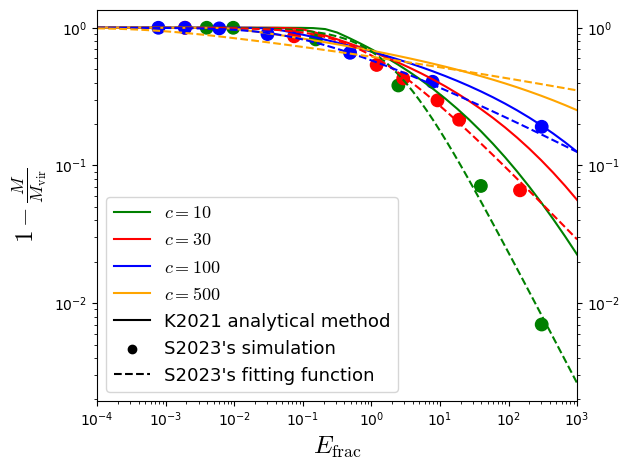

In [4]:
plt.rcParams["mathtext.fontset"] = "cm"

plt.loglog(E_fracs, survival_fractions_c_10, color="green", label=r"$c=10$")
plt.loglog(E_fracs, survival_fractions_c_30, color="red", label=r"$c=30$")
plt.loglog(E_fracs, survival_fractions_c_100, color="blue", label=r"$c=100$")
plt.loglog(E_fracs, survival_fractions_c_500, color="orange", label=r"$c=500$")
plt.loglog([], [], color="black", label="K2021 analytical method")

plt.scatter(data_c_10[:,0], data_c_10[:,1], 80*np.ones(np.size(data_c_10[:,0])), color="green", marker="o")
plt.scatter(data_c_30[:,0], data_c_30[:,1], 80*np.ones(np.size(data_c_30[:,0])), color="red", marker="o")
plt.scatter(data_c_100[:,0], data_c_100[:,1], 80*np.ones(np.size(data_c_100[:,0])), color="blue", marker="o")
plt.scatter([], [], color="black", label=r"S2023's simulation")
plt.yscale("log")
plt.xscale("log")

E_fracs_71 = np.geomspace(1e-4, 1e3, 71) # The S2023 fitting functions have been computed based on an E_frac array that has 71 elements in it. Hence, we use 71 elements here.
plt.loglog(E_fracs_71, survival_fractions_S2022_fitting_fn_c_10, color="green", linestyle="dashed")
plt.loglog(E_fracs_71, survival_fractions_S2022_fitting_fn_c_30, color="red", linestyle="dashed")
plt.loglog(E_fracs_71, survival_fractions_S2022_fitting_fn_c_100, color="blue", linestyle="dashed")
plt.loglog(E_fracs_71, survival_fractions_S2022_fitting_fn_c_500, color="orange", linestyle="dashed")
plt.loglog([], [], color="black", linestyle="dashed", label="S2023's fitting function")

plt.tick_params(which="both", labelright=True, right=True)
plt.xlabel(r"$E_{\rm frac}$", fontsize=18)
plt.ylabel(r"$1 - \frac{M}{M_{\rm vir}}$", fontsize=18)
plt.xlim(10**(-4), 10**3)
plt.legend(fontsize = 13)
plt.tight_layout()
if save_fig_to_disk:
    plt.savefig("Survival fraction vs E_frac - K2021 approach.pdf")
plt.show()